In [25]:
import pandas as pd

df = pd.read_json("data/RankCTR0827-3.json", orient="record", lines=True)
df.head(5)

,rank,sum_expose,sum_click,ctr
0,26,424879,7779,0.018309
1,597,3094,6,0.001939
2,884,1043,3,0.002876
3,957,841,1,0.001189
4,1211,439,0,0.000000


In [26]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


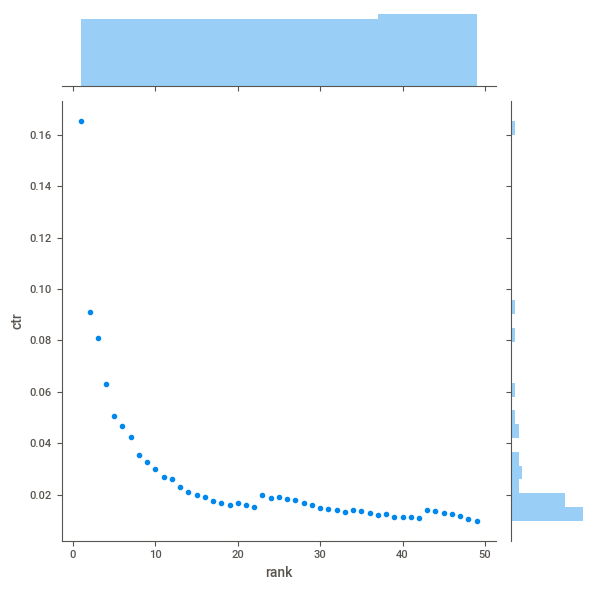

In [27]:
import seaborn as sns

topRankDF = df[df["rank"] < 50]
sns.jointplot(x="rank", y="ctr", data=topRankDF)

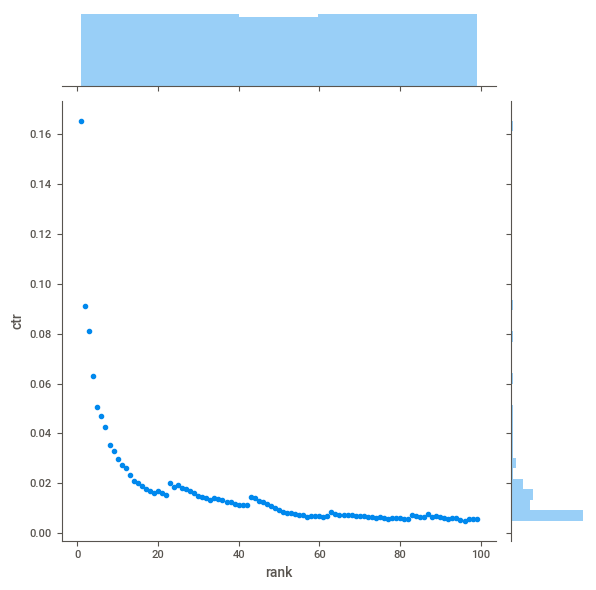

In [28]:
import seaborn as sns

topRankDF = df[df["rank"] < 100]
sns.jointplot(x="rank", y="ctr", data=topRankDF)

In [ ]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 300)

tdf = df.sort_values(by=["rank"])
tdf = tdf[tdf["rank"] > 0]
tdf.head(3)

In [ ]:
tdf.to_csv("a.csv")

In [37]:
tdf = df[df["rank"] <= 300]
tdf.shape

,rank,sum_expose,sum_click,ctr
1265,1,1335019,220632,0.165265
1148,2,1299373,118115,0.090902
663,3,1050868,84988,0.080874


In [38]:
tdf.to_csv("a.csv")

In [67]:
tdf = df[df["rank"] <= 300]
tdf.shape

(300, 4)

In [68]:
import numpy as np
ctr_arr = np.array(tdf["ctr"].tolist())
rank_arr = np.array(tdf["rank"].tolist())
ctr_arr.shape, rank_arr.shape

((300,), (300,))

In [69]:
ctr_arr_reformed = ctr_arr.reshape(ctr_arr.shape[0], -1)
rank_arr_reformed = rank_arr.reshape(rank_arr.shape[0], -1)
ctr_arr_reformed.shape, rank_arr_reformed.shape

((300, 1), (300, 1))

In [75]:
from sklearn.linear_model import TweedieRegressor
# power = Poisson distribution
# alpha 
reg = TweedieRegressor(power=2, alpha=0.0, link='auto')
reg.fit(rank_arr_reformed, ctr_arr)

TweedieRegressor(alpha=0.0, power=2)

In [76]:
pred = reg.predict(rank_arr_reformed)
pred

array([0.01356149, 0.01348165, 0.01340228, 0.01332338, 0.01324494,
       0.01316696, 0.01308944, 0.01301238, 0.01293577, 0.01285962,
       0.01278391, 0.01270864, 0.01263382, 0.01255945, 0.0124855 ,
       0.012412  , 0.01233893, 0.01226628, 0.01219407, 0.01212228,
       0.01205091, 0.01197996, 0.01190943, 0.01183932, 0.01176962,
       0.01170032, 0.01163144, 0.01156296, 0.01149489, 0.01142721,
       0.01135994, 0.01129306, 0.01122657, 0.01116048, 0.01109477,
       0.01102946, 0.01096452, 0.01089997, 0.0108358 , 0.01077201,
       0.01070859, 0.01064554, 0.01058287, 0.01052056, 0.01045863,
       0.01039705, 0.01033584, 0.01027499, 0.0102145 , 0.01015436,
       0.01009458, 0.01003515, 0.00997607, 0.00991734, 0.00985895,
       0.00980091, 0.00974321, 0.00968585, 0.00962883, 0.00957214,
       0.00951578, 0.00945976, 0.00940407, 0.0093487 , 0.00929367,
       0.00923895, 0.00918456, 0.00913049, 0.00907673, 0.00902329,
       0.00897017, 0.00891736, 0.00886486, 0.00881267, 0.00876

In [74]:
reg.coef_

array([-0.00828669])

In [34]:
reg.intercept_

-4.201261237110927

In [12]:
topRankDF.describe()

,rank,sum_expose,sum_click,ctr
count,499.000000,4.990000e+02,499.000000,499.000000
mean,250.000000,1.037392e+05,1777.533066,0.005196
std,144.193157,2.138693e+05,10483.447860,0.009227
min,1.000000,3.018000e+03,3.000000,0.000977
25%,125.500000,6.760000e+03,21.500000,0.003232
50%,250.000000,1.959700e+04,75.000000,0.003851
75%,374.500000,7.625550e+04,336.000000,0.004520
max,499.000000,1.137035e+06,178670.000000,0.157137


In [20]:
import math
topRankDF['log10CTR'] = topRankDF['ctr'].apply(lambda x: math.log10(x + 1))
topRankDF['loglog10CTR'] = topRankDF['ctr'].apply(lambda x: math.log10(math.log10(x + 1) + 1))
topRankDF['logeCTR'] = topRankDF['ctr'].apply(lambda x: math.log(x + 1))

<ipython-input-20-d541d0116e5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topRankDF['log10CTR'] = topRankDF['ctr'].apply(lambda x: math.log10(x + 1))
<ipython-input-20-d541d0116e5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topRankDF['loglog10CTR'] = topRankDF['ctr'].apply(lambda x: math.log10(math.log10(x + 1) + 1))
<ipython-input-20-d541d0116e5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [17]:
topRankDF.head(10)

,rank,sum_expose,sum_click,ctr,logCTR,log10CTR,logeCTR
0,1,1137035,178670,0.157137,-0.803722,0.063385,0.145949
1,2,1075147,104070,0.096796,-1.014142,0.040126,0.092393
2,3,1049367,66959,0.063809,-1.195118,0.026864,0.061856
3,4,1037845,50646,0.048799,-1.311587,0.020692,0.047646
4,5,1037542,37374,0.036022,-1.443436,0.015369,0.035388
5,6,1020062,31126,0.030514,-1.515503,0.013054,0.030058
6,7,1011521,25705,0.025412,-1.594957,0.010898,0.025095
7,8,1008045,24564,0.024368,-1.613181,0.010456,0.024076
8,9,1003515,20236,0.020165,-1.695399,0.008670,0.019964
9,10,998395,19560,0.019591,-1.707934,0.008426,0.019402


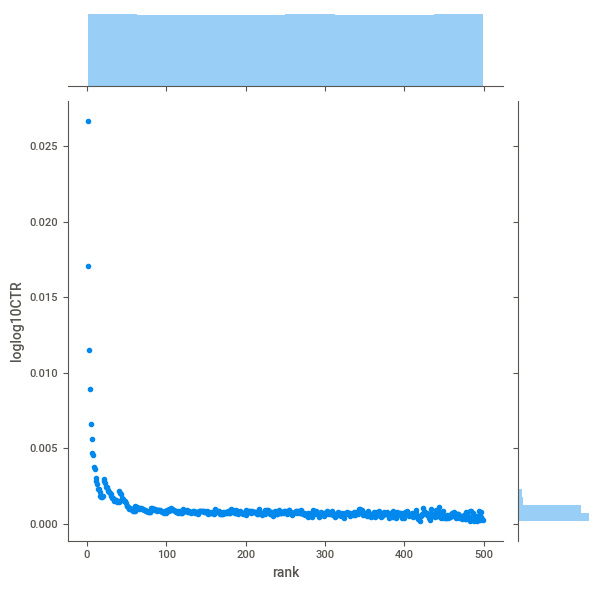

In [21]:
import seaborn as sns

sns.jointplot(x="rank", y="loglog10CTR", data=topRankDF)

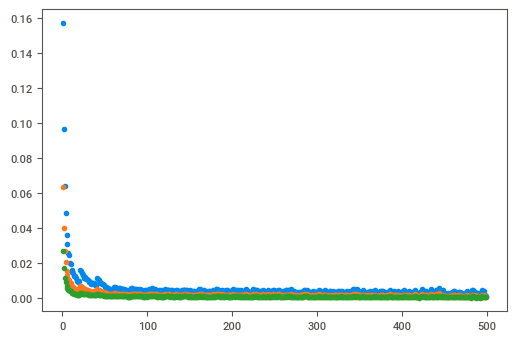

In [29]:
import matplotlib.pyplot as plt

plt.scatter(topRankDF["rank"], topRankDF["ctr"])
plt.scatter(topRankDF["rank"], topRankDF["log10CTR"])
plt.scatter(topRankDF["rank"], topRankDF["loglog10CTR"])
plt.show()